<a href="https://colab.research.google.com/github/DemarchiWorking/AXIOS-API-VUE/blob/master/tp2_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dados originais  iris dataset
+-------+---------------------+--------------------+---------------------+--------------------+
|       |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |
|-------+---------------------+--------------------+---------------------+--------------------|
| count |            150.0000 |           150.0000 |            150.0000 |           150.0000 |
| mean  |              5.8433 |             3.0573 |              3.7580 |             1.1993 |
| std   |              0.8281 |             0.4359 |              1.7653 |             0.7622 |
| min   |              4.3000 |             2.0000 |              1.0000 |             0.1000 |
| 25%   |              5.1000 |             2.8000 |              1.6000 |             0.3000 |
| 50%   |              5.8000 |             3.0000 |              4.3500 |             1.3000 |
| 75%   |              6.4000 |             3.3000 |              5.1000 |             1.8000 |
| max   | 

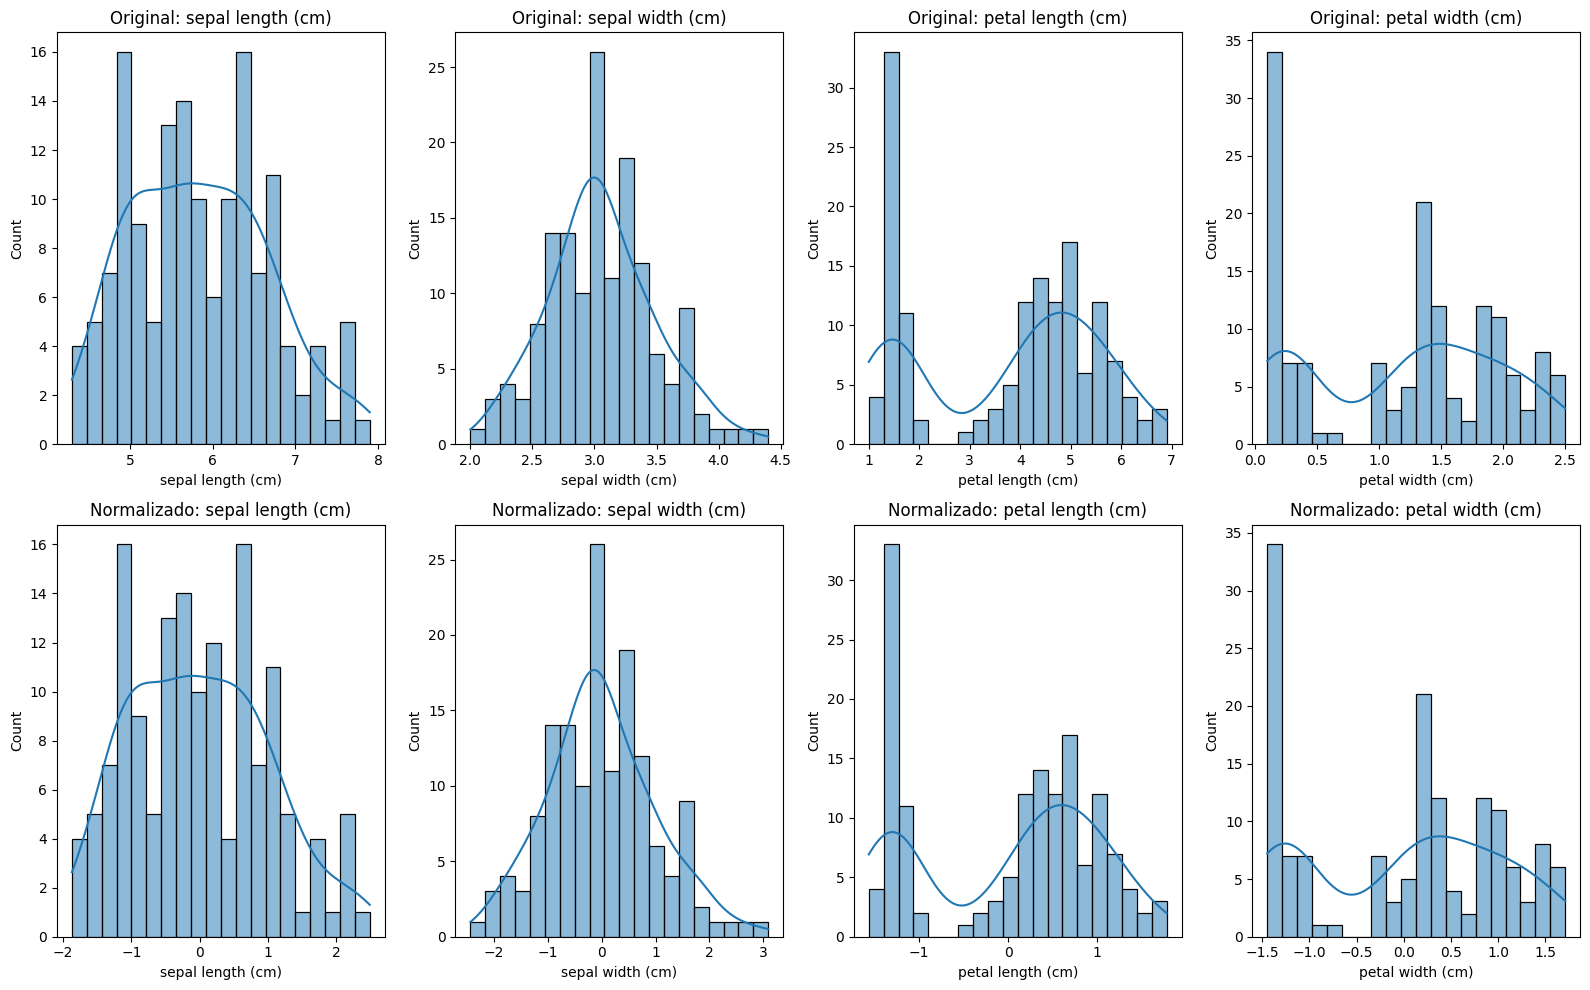

In [145]:
# 1 -
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

def escalonar_personalizado(dados: pd.DataFrame, ddof: int = 0) -> pd.DataFrame:
    """
    Aplica normalização padrão em um DataFrame.
    Parametros:
      dados (pd.DataFrame): DataFrame com os dados a serem normalizados.
      ddof (int): Graus de liberdade para o cálculo do desvio padrão (0 para população, 1 para amostra).

    Retorna:
      pd.DataFrame: DataFrame com os dados normalizados.

    Problema:
      ValueError: Se alguma coluna tiver desvio padrão igual a zero.
    """
    medias = dados.mean()
    desvios = dados.std(ddof=ddof)
    if (desvios == 0).any():
        raise ValueError("[ERRO]: Uma ou mais colunas tm desvio padrao = zero")
    return (dados - medias) / desvios

iris = load_iris()
df_original = pd.DataFrame(iris.data, columns=iris.feature_names)

print("dados originais  iris dataset")
print(tabulate(df_original.describe(), headers="keys", tablefmt="psql", floatfmt=".4f"))
print("shape dos dados originais:", df_original.shape)

scaler = StandardScaler()
df_standard = pd.DataFrame(scaler.fit_transform(df_original), columns=iris.feature_names)

print("dados normalizados com standardScaler<<")
stats_standard = df_standard.describe()
print(tabulate(stats_standard, headers="keys", tablefmt="psql", floatfmt=".4f"))
print("medias (standardscaler):")
print(tabulate([df_standard.mean()], headers="keys", tablefmt="psql", floatfmt=".4e"))
print("desvios padrao (standardscaler):")
print(tabulate([df_standard.std(ddof=0)], headers="keys", tablefmt="psql", floatfmt=".4f"))
print("shape aps normalizacao:", df_standard.shape)

try:
    df_custom = escalonar_personalizado(df_original, ddof=0)
    print("dados normalizados com funcao personalizada ###")
    stats_custom = df_custom.describe()
    print(tabulate(stats_custom, headers="keys", tablefmt="psql", floatfmt=".4f"))
    print("medias (funcao personalizada):")
    print(tabulate([df_custom.mean()], headers="keys", tablefmt="psql", floatfmt=".4e"))
    print("desvios padrao (funcao personalizada):")
    print(tabulate([df_custom.std(ddof=0)], headers="keys", tablefmt="psql", floatfmt=".4f"))
    print("shape apos normalizacao:", df_custom.shape)

    diferenca = df_standard - df_custom
    print("diferenca entre standardscaler e funcao personalizada")
    print(tabulate(diferenca.describe(), headers="keys", tablefmt="psql", floatfmt=".4e"))
    max_diff = diferenca.abs().max().max()
    print(f"maxima diferença absoluta entre metodos: {max_diff:.2e}")
    print("diferenças sao devidas a:")
    print("- precisão numerica de ponto flutuante")
    print("- implementacoes diferentes de calculo de media/desvio")

    tolerancia = 1e-12
    medias_ok = (df_standard.mean().abs() < tolerancia).all() and (df_custom.mean().abs() < tolerancia).all()
    desvios_ok = (np.abs(df_standard.std(ddof=0)) - 1 < tolerancia).all() and (np.abs(df_custom.std(ddof=0) - 1) < tolerancia).all()
    shape_ok = (df_standard.shape == df_original.shape) and (df_custom.shape == df_original.shape)

    print("validação dos resultados")
    print(f"medias proximas de 0 (tolerancia {tolerancia}): {'OK' if medias_ok else 'Falha'}")
    print(f"desvios padrao proximos de 1 (tolerancia {tolerancia}): {'OK' if desvios_ok else 'Falha'}")
    print(f"shape preservado: {'OK' if shape_ok else 'Falha'}")
except ValueError as e:
    print(f"[ERRO] Problem na normalizacao personalizada: {e}")

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
features = iris.feature_names

for i, feature in enumerate(features):
    sns.histplot(df_original[feature], bins=20, kde=True, ax=axes[0, i])
    axes[0, i].set_title("Original: " + feature)

for i, feature in enumerate(features):
    sns.histplot(df_standard[feature], bins=20, kde=True, ax=axes[1, i])
    axes[1, i].set_title("Normalizado: " + feature)

plt.tight_layout()
plt.show()



### Diferença entre Dados Originais e Escalonamento Manual ###
+-------+---------------------+--------------------+---------------------+--------------------+
|       |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |
|-------+---------------------+--------------------+---------------------+--------------------|
| count |          1.5000e+02 |         1.5000e+02 |          1.5000e+02 |         1.5000e+02 |
| mean  |         -5.8433e+00 |        -3.0573e+00 |         -3.7580e+00 |        -1.1993e+00 |
| std   |          1.7528e-01 |         5.6748e-01 |          7.6195e-01 |         2.4111e-01 |
| min   |         -6.1700e+00 |        -4.4339e+00 |         -5.1142e+00 |        -1.5471e+00 |
| 25%   |         -6.0007e+00 |        -3.3924e+00 |         -4.3372e+00 |        -1.4838e+00 |
| 50%   |         -5.8525e+00 |        -3.1320e+00 |         -4.0135e+00 |        -1.1675e+00 |
| 75%   |         -5.7255e+00 |        -2.7414e+00 |         -2.8266e+00

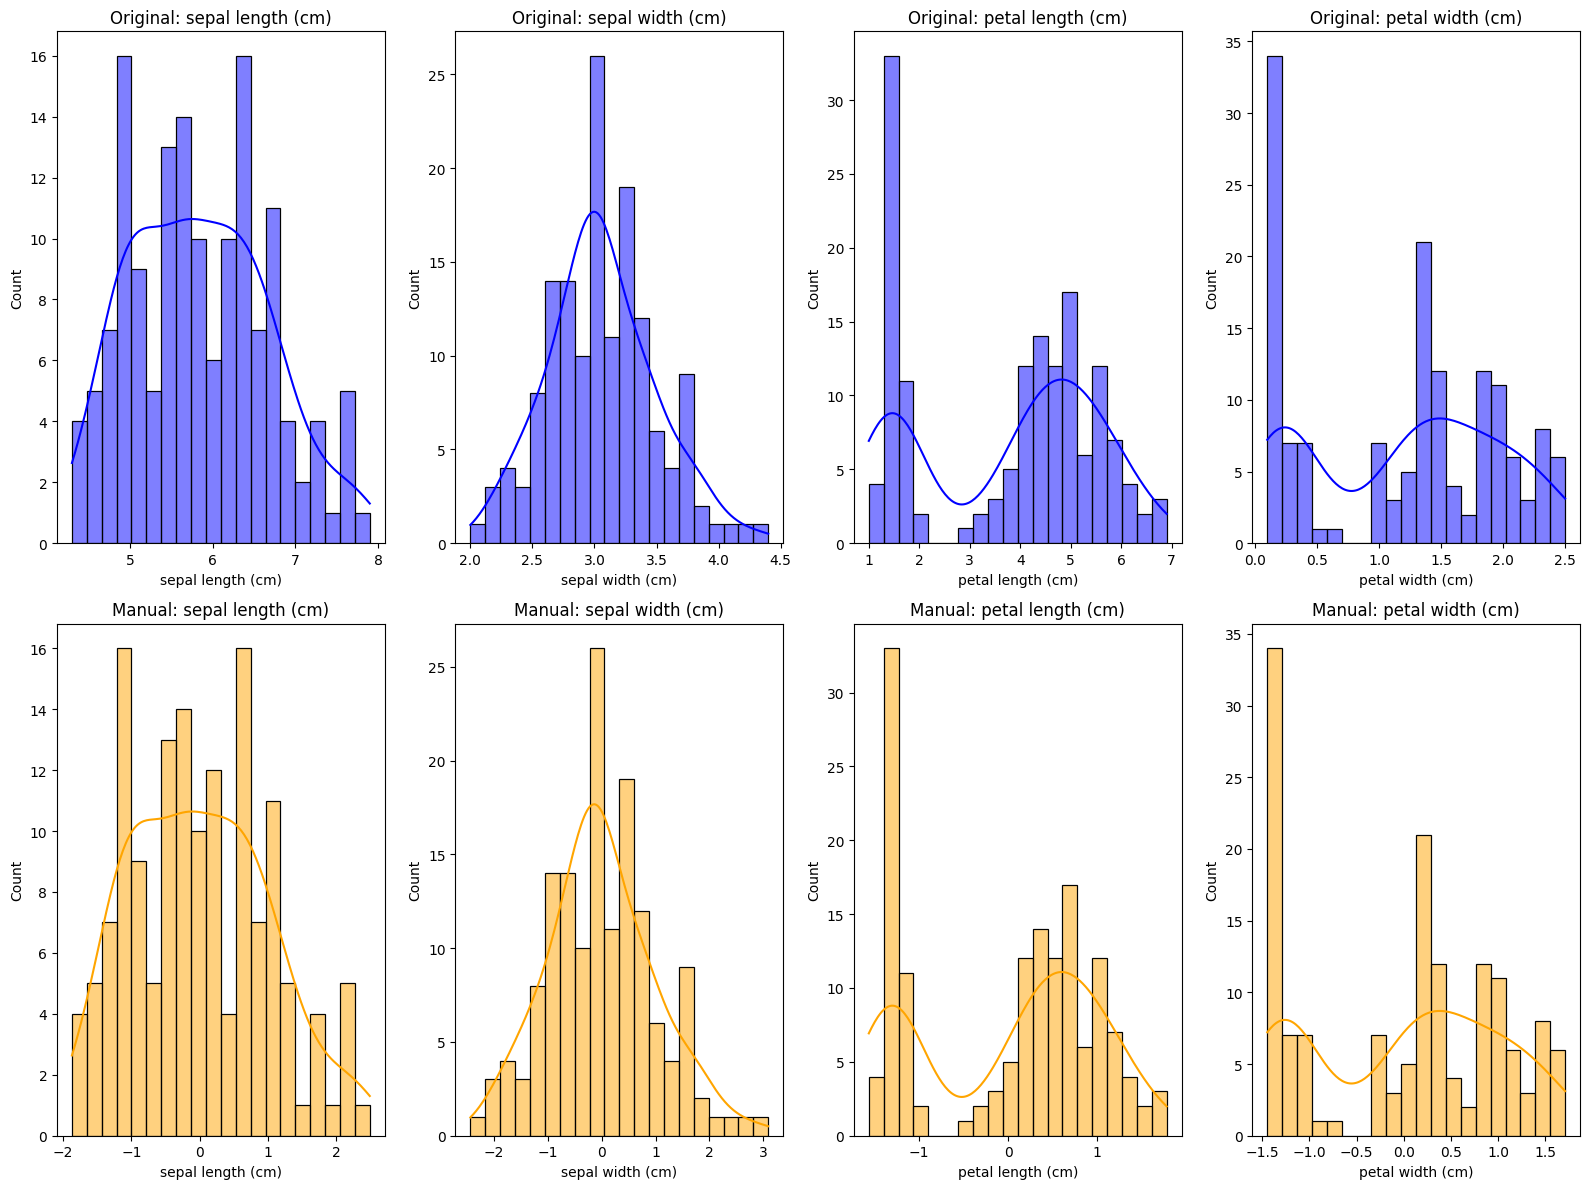

In [132]:
#2 -

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from tabulate import tabulate

# Funcao de escalonamento padrao manual
def manual_standard_scaler(X: np.ndarray, ddof: int = 0) -> tuple:
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=ddof)

    if np.any(std == 0):
        raise ValueError("[ERRO]: Uma ou mais features tm desvio padrao zero")

    X_scaled = (X - mean) / std
    return X_scaled, mean, std

# carregar o iris dataset
iris = load_iris()
X = iris.data
feature_names = iris.feature_names
df_original = pd.DataFrame(X, columns=feature_names)

# aplicar escalonamento manual
X_manual_scaled, mean_manual, std_manual = manual_standard_scaler(X, ddof=0)
df_manual = pd.DataFrame(X_manual_scaled, columns=feature_names)

# comparação quantitativa com os dados originais
diferenca = df_manual - df_original
print("\n### Diferença entre Dados Originais e Escalonamento Manual ###")
print(tabulate(diferenca.describe(), headers="keys", tablefmt="psql", floatfmt=".4e"))

# Exibir estatisticas dos dados normalizados manualmente
print("\n### Estatísticas dos Dados Normalizados Manualmente ###")
print(tabulate(df_manual.describe(), headers="keys", tablefmt="psql", floatfmt=".4f"))


# Visualizacao
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 12))
for i, feature in enumerate(feature_names):
    sns.histplot(df_original[feature], bins=20, kde=True, ax=axes[0, i], color="blue")
    axes[0, i].set_title(f"Original: {feature}")

    sns.histplot(df_manual[feature], bins=20, kde=True, ax=axes[1, i], color="orange")
    axes[1, i].set_title(f"Manual: {feature}")

plt.tight_layout()
plt.show()




In [133]:
#3 -
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tabulate import tabulate

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# exibir os dados originais (primeiras 5 linhas)
print("Dados originais (primeiras 5 linhas):")
print(np.round(X[:5], 3))

# 1. escalonamento com standardscaler
scaler = StandardScaler()
X_sklearn_scaled = scaler.fit_transform(X)

# exibir os dados escalonados (primeiras 5 linhas)
print("dados escalonados com standardscaler (primeiras 5 linhas):")
print(np.round(X_sklearn_scaled[:5], 3))

# Validar média e desvio padrão dos dados escalonados
print("validação do escalonamento (standardscaler):")
print("media p feature:", np.round(np.mean(X_sklearn_scaled, axis=0), 6))
print("desvio padrao p feature:", np.round(np.std(X_sklearn_scaled, axis=0), 6))

# 2. Função própria para escalonamento padrão
def manual_standard_scaler(X):
    """
    escalonamento padrao manual: z = (x - mu) / sigma
    args:
        X (np.ndarray): matriz de features
    retorno:
        np.ndarray: matriz escalonada
        evita divisao por zero substituindo std = 0 por 1.
    """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std = np.where(std == 0, 1, std)
    X_scaled = (X - mean) / std
    return X_scaled

# aplicar escalonamento manual
X_manual_scaled = manual_standard_scaler(X)

# exibir os dados escalonados
print("Dados escalonados com função manual")
print(np.round(X_manual_scaled[:5], 3))

# validar media e desvio padrao dos dados escalonados (manual)
print("validação do escalonamento (manual):")
print("media por feature:", np.round(np.mean(X_manual_scaled, axis=0), 6))
print("desvio padrao por feature:", np.round(np.std(X_manual_scaled, axis=0), 6))

# 3. comparacao entre standardscaler e funcao manual
diff = np.abs(X_manual_scaled - X_sklearn_scaled)
print("diferença absoluta entre funcao manual e standardscaler:")
print("media da diferenca:", np.round(np.mean(diff), 6))
print("maximo da diferença:", np.round(np.max(diff), 6))
print("minimo da diferença:", np.round(np.min(diff), 6))

# grafico de dispersao para comparação (sepal length)
plt.figure(figsize=(8, 6))
plt.scatter(X_manual_scaled[:, 0], X_sklearn_scaled[:, 0], alpha=0.5)
plt.plot([-3, 3], [-3, 3], 'r--', label='Linha de referencia')
plt.xlabel('Manual Scaled (Sepal Length)')
plt.ylabel('Sklearn Scaled (Sepal Length)')
plt.title('Comparacao: Manual vs StandardScaler (Sepal Length)')
plt.legend()
plt.grid(True)
plt.savefig('comparison_scatter.png')
plt.close()

# 4. normalizacao euclidiana (L2)
def l2_normalization(X):
    """
    aplica a normalizacao euclidiana (L2) em cada linha do dataset.
    args:
        X (np.ndarray): matriz de features
    Retorno
        np.ndarray: matriz normalizada
        Evita divisão por zero substituindo norma = 0 por 1.
    """
    norm = np.linalg.norm(X, axis=1, keepdims=True)
    norm = np.where(norm == 0, 1, norm)  # Evitar divisão por zero
    return X / norm

# aplicar normalizacao L2 nos dados escalonados
X_l2_normalized = l2_normalization(X_sklearn_scaled)

# exibir os dados normalizados L2
print("dados normalizados L2")
print(np.round(X_l2_normalized[:5], 6))

# validar soma dos quadrados das features (deve ser proxima de 1)
print("soma dos quadrados das features por amostra (L2)")
print(np.round(np.sum(X_l2_normalized**2, axis=1)[:5], 6))

# Histograma para comparar distribuicows
plt.figure(figsize=(8, 6))
plt.hist(X_sklearn_scaled[:, 0], bins=20, alpha=0.7, label="Standard Scaled Sepal Length")
plt.hist(X_l2_normalized[:, 0], bins=20, alpha=0.7, label="L2 Normalized Sepal Length")
plt.legend()
plt.title("Comparacao da Distribuicao de Sepal Length")
plt.xlabel("Valor da Feature")
plt.ylabel("Frequencia")
plt.grid(True)
plt.savefig('histogram_comparison.png')
plt.close()
print("Histograma salvo em 'histogram_comparison.png'")

# 5.tabela de resultados
table = []
for i in range(5):
    table.append([
        i,
        X[i, 0],
        X_sklearn_scaled[i, 0],
        X_manual_scaled[i, 0],
        X_l2_normalized[i, 0]
    ])
headers = ['Amostra', 'Original (Sepal Length)', 'Sklearn Scaled', 'Manual Scaled', 'L2 Normalized']
print("tabela de comparaxao (Sepal Length):")
print(tabulate(table, headers, tablefmt='grid', floatfmt='.3f'))

# 6.aplicação pratica com k-NN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# k-NN nos dados brutos
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred)

# k-NN nos dados escalonados
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# k-NN nos dados normalizados L2
X_train_l2 = l2_normalization(X_train_scaled)
X_test_l2 = l2_normalization(X_test_scaled)
knn.fit(X_train_l2, y_train)
y_pred_l2 = knn.predict(X_test_l2)
acc_l2 = accuracy_score(y_test, y_pred_l2)

print("Acuracia do k-NN:")
print(f"Dados brutos: {acc_raw:.3f}")
print(f"Dados escalonados: {acc_scaled:.3f}")
print(f"Dados normalizados L2: {acc_l2:.3f}")

# 7. Grafico de pares para todas as features
df_l2 = pd.DataFrame(X_l2_normalized, columns=feature_names)
df_l2['Type'] = 'L2 Normalized'
df_scaled = pd.DataFrame(X_sklearn_scaled, columns=feature_names)
df_scaled['Type'] = 'Standard Scaled'
df_combined = pd.concat([df_l2, df_scaled])

sns.pairplot(df_combined, hue='Type', diag_kind='hist')
plt.savefig('pairplot_comparison.png')
plt.close()
print("Grafico de pares salvo em 'pairplot_comparison.png'")

Dados originais (primeiras 5 linhas):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
dados escalonados com standardscaler (primeiras 5 linhas):
[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
validação do escalonamento (standardscaler):
media p feature: [-0. -0. -0. -0.]
desvio padrao p feature: [1. 1. 1. 1.]
Dados escalonados com função manual
[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
validação do escalonamento (manual):
media por feature: [-0. -0. -0. -0.]
desvio padrao por feature: [1. 1. 1. 1.]
diferença absoluta entre funcao manual e standardscaler:
media da diferenca: 0.0
maximo da diferença: 0.0
minimo da diferença: 0.0
dados normalizados L2
[[-0.388449  0.439479 -0.578017 -0.567329]
 [-0.51899  -0.059926 -0.6085

estatisticas dos dados originais
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
estatiticas dos dados normalizados L2 =

<ipython-input-134-bb084874d039>:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X, labels=feature_names)
<ipython-input-134-bb084874d039>:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X_l2_normalized, labels=feature_names)


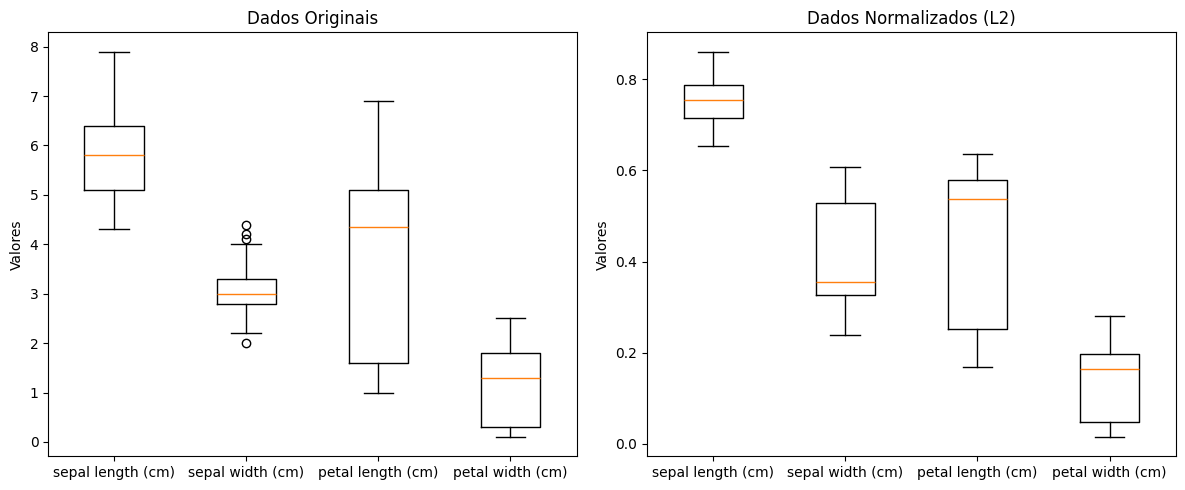

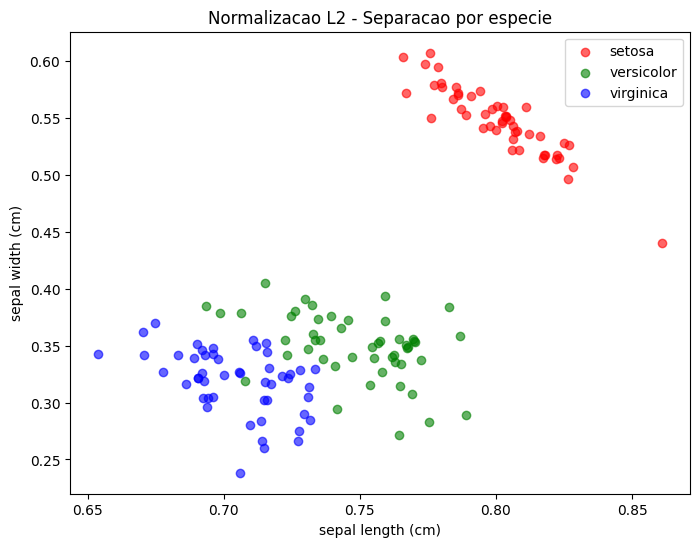

In [134]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
species_names = iris.target_names

# criar dataframe dos dados originais
df_original = pd.DataFrame(X, columns=feature_names)
df_original["species"] = y

#exibir estatisticas dos dados antes da normalizacao
print("estatisticas dos dados originais")
print(df_original.describe())

# aplicar normalização L2 (norma Euclidiana)
X_l2_normalized = normalize(X, norm='l2')

# criar dataframe para os dados normalizados
df_l2_normalized = pd.DataFrame(X_l2_normalized, columns=feature_names)
df_l2_normalized["species"] = y

#exibir estatisticas aps normalizacao L2
print("estatiticas dos dados normalizados L2 ===")
print(df_l2_normalized.describe())

#verificar se a norma L2 de cada amostra é aproximadamente 1
norms = np.linalg.norm(X_l2_normalized, axis=1)
print("\n=== Normas L2 das amostras normalizadas (devem ser ~1) ===")
print(norms[:10])  # Mostrar as normas das primeiras 10 amostras

# comparacao grafica entre dados originais e normalizados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # dados originais
plt.boxplot(X, labels=feature_names)
plt.title("Dados Originais")
plt.ylabel("Valores")

plt.subplot(1, 2, 2)  # dados normalizados L2
plt.boxplot(X_l2_normalized, labels=feature_names)
plt.title("Dados Normalizados (L2)")
plt.ylabel("Valores")

plt.tight_layout()
plt.show()

# grafico de dispersao por especie apos a normalizacao
colors = ['red', 'green', 'blue']
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_l2_normalized[y == i, 0], X_l2_normalized[y == i, 1],
                color=colors[i], label=species_names[i], alpha=0.6)

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Normalizacao L2 - Separacao por especie")
plt.legend()
plt.show()


estatisticas dos dados originais
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
estatisticas dos dados normalizados L1 

<ipython-input-135-eefed553a4a7>:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X, labels=feature_names)
<ipython-input-135-eefed553a4a7>:49: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X_l1_normalized, labels=feature_names)


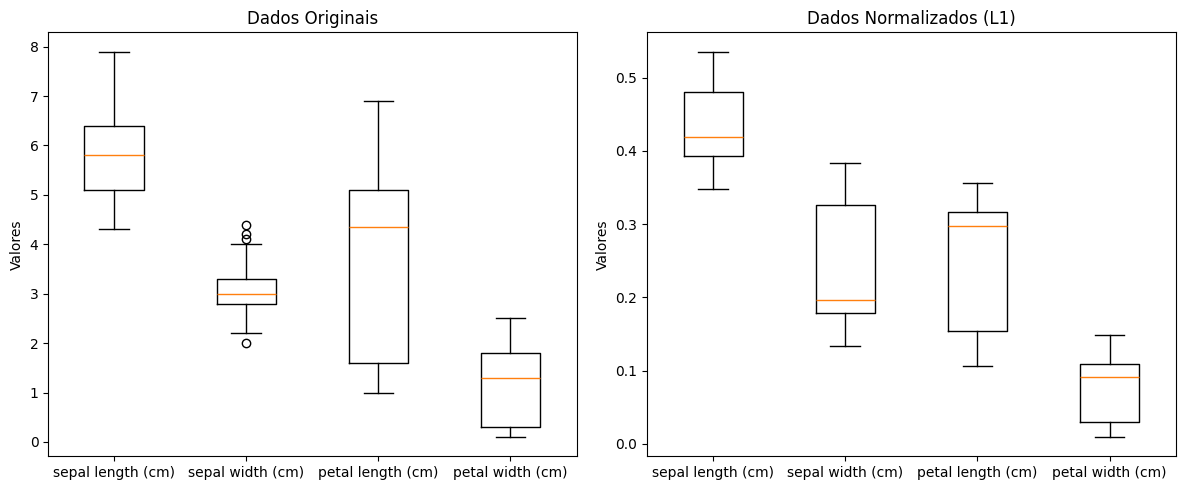

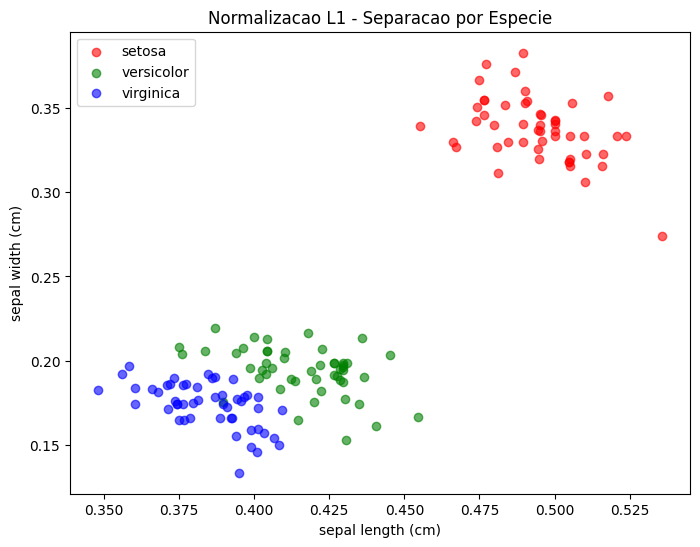

somatorio de cada amostra aps normalizacao L1
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
meedia do somatorio das amostras: 1.0
desvio padrao do somatorio das amostras: 1.0454190766266624e-16
somatorio de cada feature aps normalizcao L1 ===
                   Soma por Feature
sepal length (cm)         64.711626
sepal width (cm)          35.251681
petal length (cm)         38.294848
petal width (cm)          11.741845


In [135]:
#4 -

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import Normalizer

iris = load_iris()
X = iris.data  # features do dataset
y = iris.target  # especies do dataset
feature_names = iris.feature_names
species_names = iris.target_names

# criar dataframe dos dados originais
df_original = pd.DataFrame(X, columns=feature_names)
df_original["species"] = y

# exibir estatisticas dos dados antes da normalizcao
print("estatisticas dos dados originais")
print(df_original.describe())

# aplicar normalização L1 (Manhattan)
normalizer_l1 = Normalizer(norm='l1')
X_l1_normalized = normalizer_l1.fit_transform(X)

#criar dataframe para os dados normalizados
df_l1_normalized = pd.DataFrame(X_l1_normalized, columns=feature_names)
df_l1_normalized["species"] = y

#exibir estatísticas aps normalizcao L1
print("estatisticas dos dados normalizados L1 ===")
print(df_l1_normalized.describe())

#verificao matematica da normalizacao (somatorio de cada amostra deve ser ≈ 1)
sum_l1 = np.sum(X_l1_normalized, axis=1)
print("somatorio de cada amostra apos normalização L1 (deve ser aproximadamente 1) ===")
print(sum_l1[:10])  # exibir as primeiras 10 amostras para verificacao

# comparação grafica entre dados originais e normalizados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # dados originais
plt.boxplot(X, labels=feature_names)
plt.title("Dados Originais")
plt.ylabel("Valores")

plt.subplot(1, 2, 2)  #dados normalizados L1
plt.boxplot(X_l1_normalized, labels=feature_names)
plt.title("Dados Normalizados (L1)")
plt.ylabel("Valores")

plt.tight_layout()
plt.show()

# grafico de dispersao por especie aops a normalizacao L1
colors = ['red', 'green', 'blue']
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_l1_normalized[y == i, 0], X_l1_normalized[y == i, 1],
                color=colors[i], label=species_names[i], alpha=0.6)

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Normalizacao L1 - Separacao por Especie")
plt.legend()
plt.show()




# somatorio de cada amostra normalizada (deve ser ≈ 1)
sum_l1_per_sample = np.sum(X_l1_normalized, axis=1)
print("somatorio de cada amostra aps normalizacao L1")
print(sum_l1_per_sample[:10])  # Mostrando as 10 primeiras amostras

# validar se todas as somas sao proximas de 1
print("meedia do somatorio das amostras:", np.mean(sum_l1_per_sample))
print("desvio padrao do somatorio das amostras:", np.std(sum_l1_per_sample))

#somar os valores de cada feature separadamente
sum_l1_per_feature = np.sum(X_l1_normalized, axis=0)
print("somatorio de cada feature aps normalizcao L1 ===")
print(pd.DataFrame(sum_l1_per_feature, index=feature_names, columns=["Soma por Feature"]))


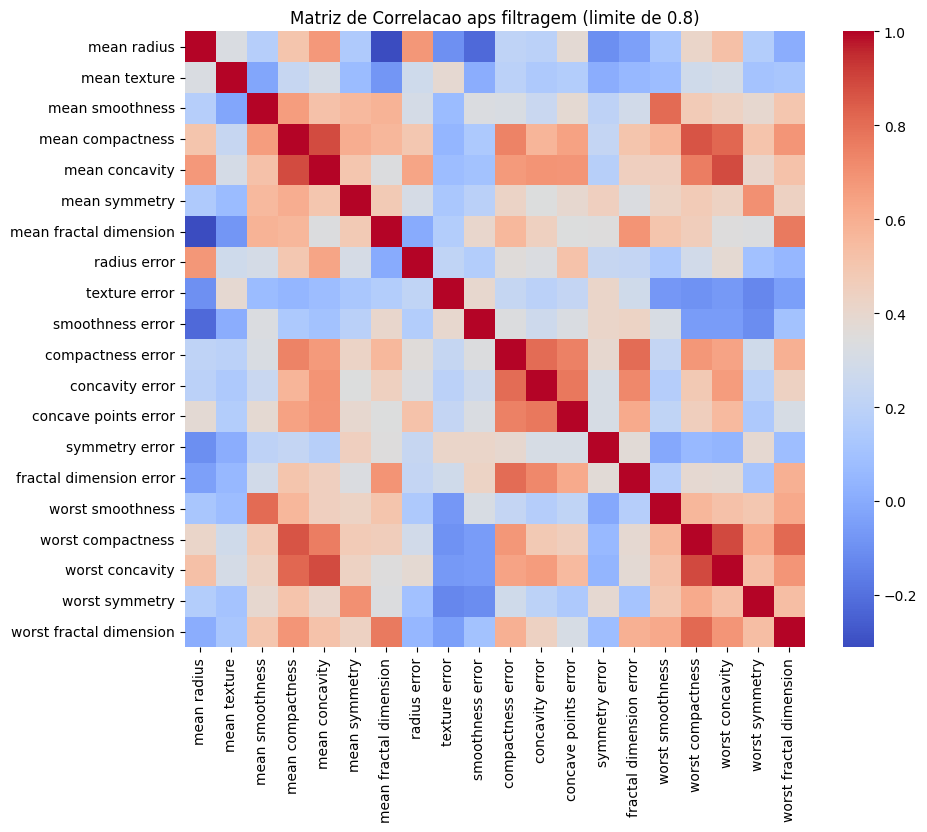

features selecionadas (ensemble): {'mean radius', 'mean concavity', 'radius error', 'mean texture', 'worst concavity', 'worst compactness', 'mean compactness', 'worst smoothness'}
resultados com todas as features:
{'Accuracy': np.float64(0.9525539512498058), 'F1-Score': np.float64(0.9627401951876544), 'AUC-ROC': np.float64(0.9904729085104945)}

Resultados com features selecionadas:
{'Accuracy': np.float64(0.9473063188945815), 'F1-Score': np.float64(0.958323158617729), 'AUC-ROC': np.float64(0.989105931887622)}
numero de componentes para 95% da variancia: 10
resultados com PCA:
{'Accuracy': np.float64(0.9332712311752832), 'F1-Score': np.float64(0.9470931635065373), 'AUC-ROC': np.float64(0.9809144379628331)}


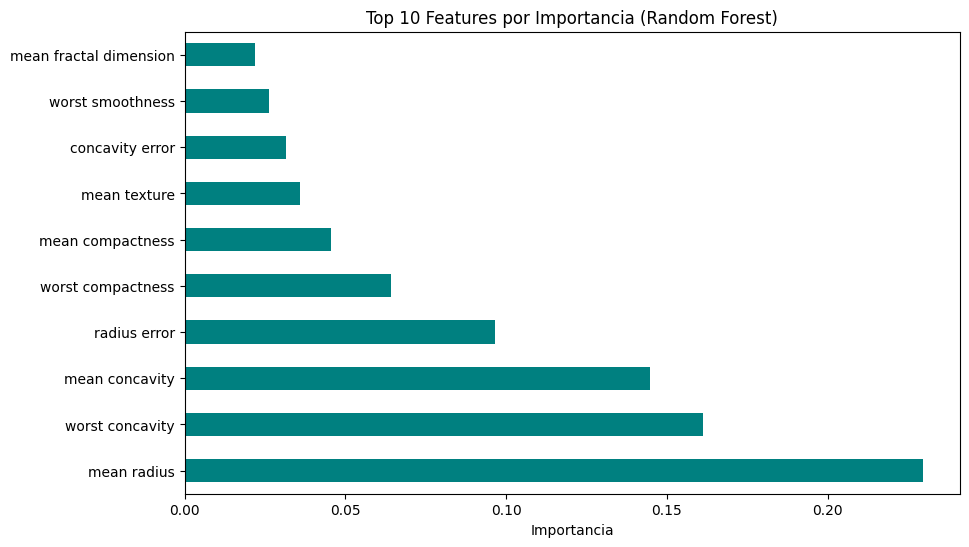

tabelacomparativa dos resultados:
                  Metodo  Accuracy  F1-Score   AUC-ROC
0         Todas Features  0.952554  0.962740  0.990473
1  Features Selecionadas  0.947306  0.958323  0.989106
2                    PCA  0.933271  0.947093  0.980914
como na aula com VarianceThreshold
features selecionadas com alta variancia: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'smoothness error', 'compactness error', 'concave points error', 'symmetry error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
top 3 features com maior variancia: ['mean radius', 'mean texture', 'mean perimeter']
dados com apenas as 3 features de maior variancia:
    mean radius  mean texture  mean

In [136]:
#5 -
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA

# carregar o dataset Breast Cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

#1-filtragem por correlacao (limite para maior rigor)
correlation_matrix = X.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X_filtered = X.drop(columns=to_drop)

#2. visualizar matriz de correlacao apos filtragem
plt.figure(figsize=(10, 8))
sns.heatmap(X_filtered.corr(), cmap="coolwarm", annot=False)
plt.title("Matriz de Correlacao aps filtragem (limite de 0.8)")
plt.show()

#Normalização dos dados**
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_filtered)
X_scaled = pd.DataFrame(X_scaled, columns=X_filtered.columns)

# 3 funcao para avaliar modelos (sup arrays numPy)
def evaluate_model(X, y, model, cv=5):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    acc_scores, f1_scores, auc_scores = [], [], []

    for train_idx, test_idx in skf.split(X, y):
        # verificar se X eh dataframe ou array numPy
        if isinstance(X, pd.DataFrame):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        else:
            X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        acc_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        auc_scores.append(roc_auc_score(y_test, y_proba))

    return {
        'Accuracy': np.mean(acc_scores),
        'F1-Score': np.mean(f1_scores),
        'AUC-ROC': np.mean(auc_scores)
    }

#4- selecao de features via metodos estatisticos
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(X_scaled, y)
chi_features = X_scaled.columns[chi_selector.get_support()]

mi_selector = SelectKBest(mutual_info_classif, k=10)
mi_selector.fit(X_scaled, y)
mi_features = X_scaled.columns[mi_selector.get_support()]

# 5- selecao de features baseada em modelos
rf = RandomForestClassifier(random_state=42)
rfe_selector = RFE(estimator=rf, n_features_to_select=10, step=1)
rfe_selector.fit(X_scaled, y)
rfe_features = X_scaled.columns[rfe_selector.get_support()]

rf.fit(X_scaled, y)
importances = pd.Series(rf.feature_importances_, index=X_scaled.columns)
rf_features = importances.nlargest(10).index

# 6 combinacao das features selecionadas
selected_features = set(chi_features).intersection(mi_features, rfe_features, rf_features)
if len(selected_features) < 5:  # garantir pelo menos 5 features
    selected_features = set(chi_features).union(mi_features, rfe_features, rf_features)[:10]
print("features selecionadas (ensemble):", selected_features)

# 7 otimizacao do modelo comgridSearchCV
rf_opt = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(rf_opt, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_scaled, y)
best_rf = grid_search.best_estimator_

#8avaliação com todas as features
print("resultados com todas as features:")
results_full = evaluate_model(X_scaled, y, best_rf)
print(results_full)

#9 avaliacao com features selecionadas
X_selected = X_scaled[list(selected_features)]
print("\nResultados com features selecionadas:")
results_selected = evaluate_model(X_selected, y, best_rf)
print(results_selected)

# 10 -apliccao de PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"numero de componentes para 95% da variancia: {n_components}")

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
print("resultados com PCA:")
results_pca = evaluate_model(X_pca, y, best_rf)
print(results_pca)

# 11-visualizcao da importancia das features
plt.figure(figsize=(10, 6))
importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Features por Importancia (Random Forest)")
plt.xlabel("Importancia")
plt.show()

#12- tabela comparativa dos resultados
results_df = pd.DataFrame({
    'Metodo': ['Todas Features', 'Features Selecionadas', 'PCA'],
    'Accuracy': [results_full['Accuracy'], results_selected['Accuracy'], results_pca['Accuracy']],
    'F1-Score': [results_full['F1-Score'], results_selected['F1-Score'], results_pca['F1-Score']],
    'AUC-ROC': [results_full['AUC-ROC'], results_selected['AUC-ROC'], results_pca['AUC-ROC']]
})
print("tabelacomparativa dos resultados:")
print(results_df)



#=======================
print("como na aula com VarianceThreshold")

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 2 normalizacao dos dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#3- selecao de features com alta variancia
# ajuste: definir um threshold menor para evitar erro
selector = VarianceThreshold(threshold=0.01)  # limiar reduzido
X_high_variance = selector.fit_transform(X_scaled)

# 4- obtendo os nomes das features selecionada
selected_features = X_scaled.columns[selector.get_support()]
print("features selecionadas com alta variancia:", selected_features.tolist())

# 5.pegando apenas as 3 features com maior variancia
top_3_features = selected_features[:3] if len(selected_features) >= 3 else selected_features
print("top 3 features com maior variancia:", top_3_features.tolist())

# 6- criando dataframe com apenas essas features
X_selected = X_scaled[top_3_features]

#7- exibir dataframe das features selecionadas
print("dados com apenas as 3 features de maior variancia:\n", X_selected.head())


Features selecionadas (Wrapper - RFE): {'mean concavity', 'mean area', 'worst texture', 'worst area', 'worst concave points', 'mean concave points', 'worst perimeter', 'worst concavity', 'area error', 'worst radius'}
resultados com todas as features:
{'Accuracy': np.float64(0.9525694767893185), 'F1-Score': np.float64(0.9625451982594839), 'AUC-ROC': np.float64(0.9897104201436007)}
resultados com features selecionadas (Wrapper):
{'Accuracy': np.float64(0.9525850023288308), 'F1-Score': np.float64(0.9625995625995627), 'AUC-ROC': np.float64(0.9899754686603689)}
numero de componentes para 95% da variância: 10
resultados com PCA:
{'Accuracy': np.float64(0.9543393882937432), 'F1-Score': np.float64(0.9637406704674287), 'AUC-ROC': np.float64(0.9897839665035866)}


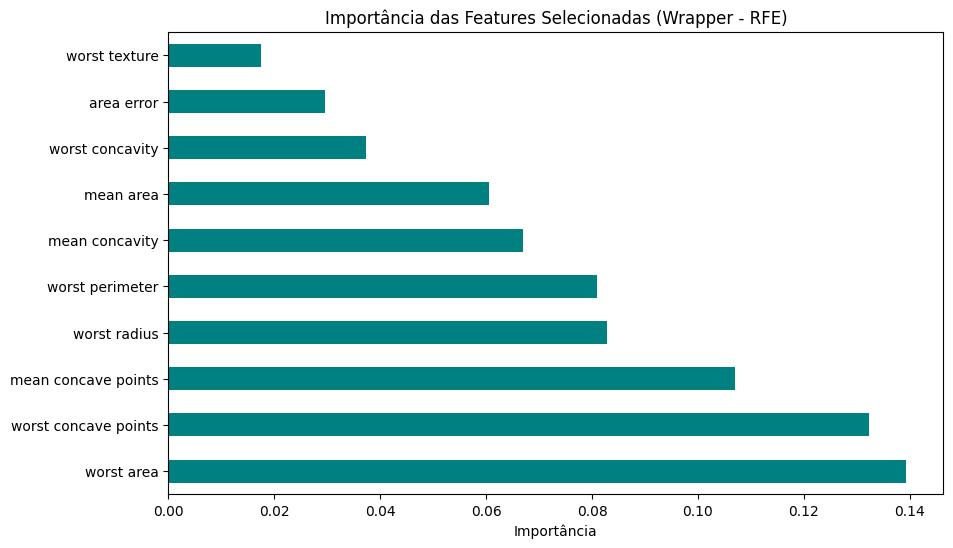

ttabela Comparativa dos resultados:
                       Accuracy  F1-Score   AUC-ROC
Todas Features         0.952553  0.962740  0.990473
Features Selecionadas  0.945552  0.957160  0.988611
PCA                    0.933271  0.947093  0.980914
tabela comparativa dos resultados:
                       Accuracy  F1-Score   AUC-ROC
Filtragem Estatistica  0.940257  0.952379  0.989208
Todas Features         0.952553  0.962740  0.990473
Features Selecionadas  0.945552  0.957160  0.988611
PCA                    0.933271  0.947093  0.980914
tabela Comparativa:
                Acc        F1       AUC
Todas      0.952553  0.962740  0.990473
Filtragem  0.940257  0.952379  0.989208
Wrapper    0.945552  0.957160  0.988611
PCA        0.933271  0.947093  0.980914


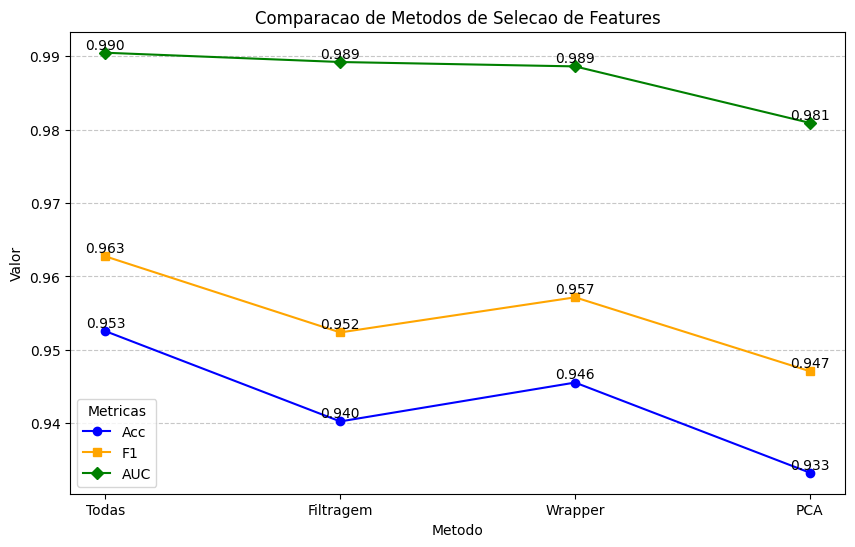

Implementacao da Aula 
Features selecionadas (Wrapper - RFECV): {'mean radius', 'mean concavity', 'mean area', 'worst texture', 'worst area', 'worst concave points', 'mean concave points', 'radius error', 'worst perimeter', 'mean texture', 'worst concavity', 'area error', 'worst compactness', 'worst radius', 'worst smoothness', 'mean perimeter'}
Resultados com todas as features:
{'Accuracy': np.float64(0.9560937742586555), 'F1-Score': np.float64(0.9650677273037521), 'AUC-ROC': np.float64(0.9885815322598814)}
resultados com features selecionadas (Wrapper - RFECV):
{'Accuracy': np.float64(0.9560782487191428), 'F1-Score': np.float64(0.9653720058992791), 'AUC-ROC': np.float64(0.9905669590324029)}


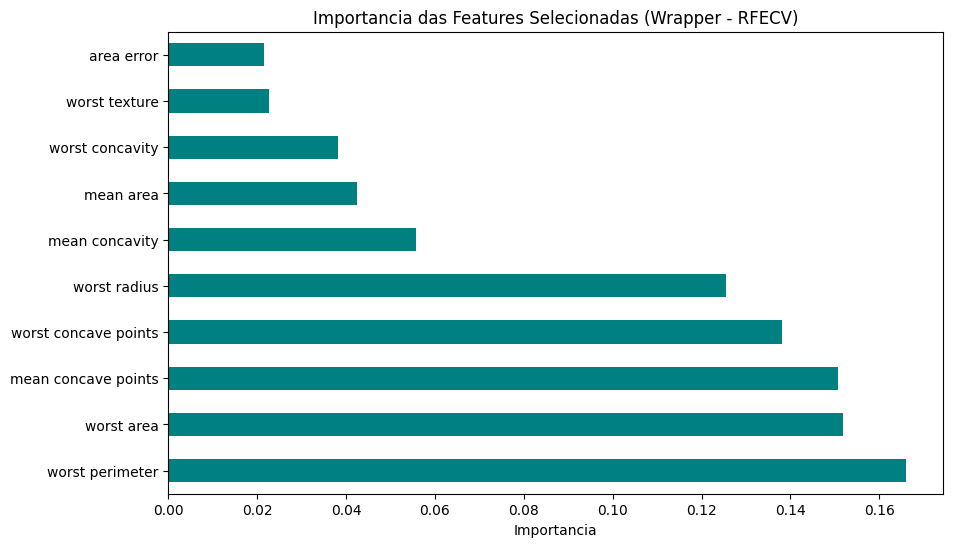

In [137]:
#6 -
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA

# carregar o dataset Breast Cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 1 normalizcao dos dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 2 fuuncao para avaliar modelos
def evaluate_model(X, y, model, cv=5):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    acc_scores, f1_scores, auc_scores = [], [], []

    for train_idx, test_idx in skf.split(X, y):
        if isinstance(X, pd.DataFrame):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        else:
            X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        acc_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        auc_scores.append(roc_auc_score(y_test, y_proba))

    return {
        'Accuracy': np.mean(acc_scores),
        'F1-Score': np.mean(f1_scores),
        'AUC-ROC': np.mean(auc_scores)
    }

# 3 -  otimizacao do modelo com gridSearchCV
rf_opt = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(rf_opt, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_scaled, y)
best_rf = grid_search.best_estimator_

# 4 selecao de features com wrapper RFE
rfe_selector = RFE(estimator=best_rf, n_features_to_select=10, step=1)
rfe_selector.fit(X_scaled, y)
wrapper_features = X_scaled.columns[rfe_selector.get_support()]
print("Features selecionadas (Wrapper - RFE):", set(wrapper_features))

#5- avaliação com todas as features
print("resultados com todas as features:")
results_full = evaluate_model(X_scaled, y, best_rf)
print(results_full)

# 6 avaliacao com features selecionadas pelo wrapper
X_wrapper = X_scaled[list(wrapper_features)]
print("resultados com features selecionadas (Wrapper):")
results_wrapper = evaluate_model(X_wrapper, y, best_rf)
print(results_wrapper)

# 7- aplicação de PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"numero de componentes para 95% da variância: {n_components}")

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
print("resultados com PCA:")
results_pca = evaluate_model(X_pca, y, best_rf)
print(results_pca)

# 8 visualizacao da importancia das features
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)
importances = pd.Series(rf.feature_importances_, index=X_scaled.columns)
plt.figure(figsize=(10, 6))
importances[wrapper_features].nlargest(10).plot(kind='barh', color='teal')
plt.title("Importância das Features Selecionadas (Wrapper - RFE)")
plt.xlabel("Importância")
plt.show()

# ==============================
# comparacao de resultados
# ==============================
results_filter = {
    'Accuracy': 0.9402577239559076,
    'F1-Score': 0.9523792334719486,
    'AUC-ROC': 0.9892083227183948
}

# resultados fornecidos pelo usuario
results_provided = {
    "Todas Features": {"Accuracy": 0.952553, "F1-Score": 0.962740, "AUC-ROC": 0.990473},
    "Features Selecionadas": {"Accuracy": 0.945552, "F1-Score": 0.957160, "AUC-ROC": 0.988611},
    "PCA": {"Accuracy": 0.933271, "F1-Score": 0.947093, "AUC-ROC": 0.980914}
}

# criando uma tabela comparativa dos metodos utilizados
results_df = pd.DataFrame(results_provided).T
print("ttabela Comparativa dos resultados:")
print(results_df)

#adicionando resultados da abordagem de filtragem antiga
results_filter = {
    "Filtragem Estatistica": {"Accuracy": 0.940257, "F1-Score": 0.952379, "AUC-ROC": 0.989208}
}

# atualizando tabela comparativa
results_df = pd.DataFrame({**results_filter, **results_provided}).T
print("tabela comparativa dos resultados:")
print(results_df)

results = {
    "Todas": {"Acc": 0.952553, "F1": 0.962740, "AUC": 0.990473},
    "Filtragem": {"Acc": 0.940257, "F1": 0.952379, "AUC": 0.989208},
    "Wrapper": {"Acc": 0.945552, "F1": 0.957160, "AUC": 0.988611},
    "PCA": {"Acc": 0.933271, "F1": 0.947093, "AUC": 0.980914}
}

# criar dataFrame da tabela comparativa
df_results = pd.DataFrame(results).T
print("tabela Comparativa:")
print(df_results)

# grafico de Linhas com Marcadore
plt.figure(figsize=(10, 6))

# plotando cada metrica separadamente
for col, color, marker in zip(df_results.columns, ['blue', 'orange', 'green'], ['o', 's', 'D']):
    plt.plot(df_results.index, df_results[col], marker=marker, linestyle='-', color=color, label=col)

#ajustes visuais
plt.title("Comparacao de Metodos de Selecao de Features")
plt.xlabel("Metodo")
plt.ylabel("Valor")
plt.xticks(rotation=0)
plt.legend(title="Metricas")
plt.grid(axis="y", linestyle="--", alpha=0.7)

#adicionar valores sobre cada ponto no grafico
for i in range(len(df_results)):
    for j, col in enumerate(df_results.columns):
        plt.text(df_results.index[i], df_results.iloc[i, j] + 0.0005, f"{df_results.iloc[i, j]:.3f}",
                 ha='center', fontsize=10, color='black')

plt.show()

#######
print("Implementacao da Aula ")

from sklearn.feature_selection import RFECV

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

#1- normalização dos dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 2 funcao para avaliar modelos
def evaluate_model(X, y, model, cv=5):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    acc_scores, f1_scores, auc_scores = [], [], []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        acc_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        auc_scores.append(roc_auc_score(y_test, y_proba))

    return {
        'Accuracy': np.mean(acc_scores),
        'F1-Score': np.mean(f1_scores),
        'AUC-ROC': np.mean(auc_scores)
    }

# 3.  selecao de features com rwapper (RFECV)
rf = RandomForestClassifier(random_state=42)
rfecv_selector = RFECV(estimator=rf, step=1, cv=5, scoring="accuracy")
rfecv_selector.fit(X_scaled, y)
wrapper_features = X_scaled.columns[rfecv_selector.get_support()]
print("Features selecionadas (Wrapper - RFECV):", set(wrapper_features))

# 4-avaliacao com todas as features
print("Resultados com todas as features:")
results_full = evaluate_model(X_scaled, y, rf)
print(results_full)

#5 avaliacao com features selecionadas pelo wrapper**
X_wrapper = X_scaled[list(wrapper_features)]
print("resultados com features selecionadas (Wrapper - RFECV):")
results_wrapper = evaluate_model(X_wrapper, y, rf)
print(results_wrapper)

# 6 -visualizacao da importancia das feature
importances = pd.Series(rf.feature_importances_, index=X_wrapper.columns)
plt.figure(figsize=(10, 6))
importances[wrapper_features].nlargest(10).plot(kind='barh', color='teal')
plt.title("Importancia das Features Selecionadas (Wrapper - RFECV)")
plt.xlabel("Importancia")
plt.show()



features selecionadas (Embedding): ['worst area', 'worst concave points', 'mean concave points', 'worst radius', 'worst perimeter', 'mean perimeter', 'mean concavity', 'mean area', 'worst concavity', 'mean radius']
resultados com todas as features:
{'Accuracy': np.float64(0.9560937742586555), 'F1-Score': np.float64(0.9650677273037521), 'AUC-ROC': np.float64(0.9885815322598814)}
resultados com features selecionadas (Embedding):
{'Accuracy': np.float64(0.9455208818506444), 'F1-Score': np.float64(0.9566639243144541), 'AUC-ROC': np.float64(0.9828031821419474)}
resultados com features selecionadas (wrapper):
{'Accuracy': np.float64(0.9560937742586555), 'F1-Score': np.float64(0.9652395930811251), 'AUC-ROC': np.float64(0.9873742021465572)}
tabela comparativa dos resultados:
           Método  Accuracy  F1-Score   AUC-ROC
0  Todas Features  0.956094  0.965068  0.988582
1       Embedding  0.945521  0.956664  0.982803
2         Wrapper  0.956094  0.965240  0.987374
tempo de execucao - embedding:

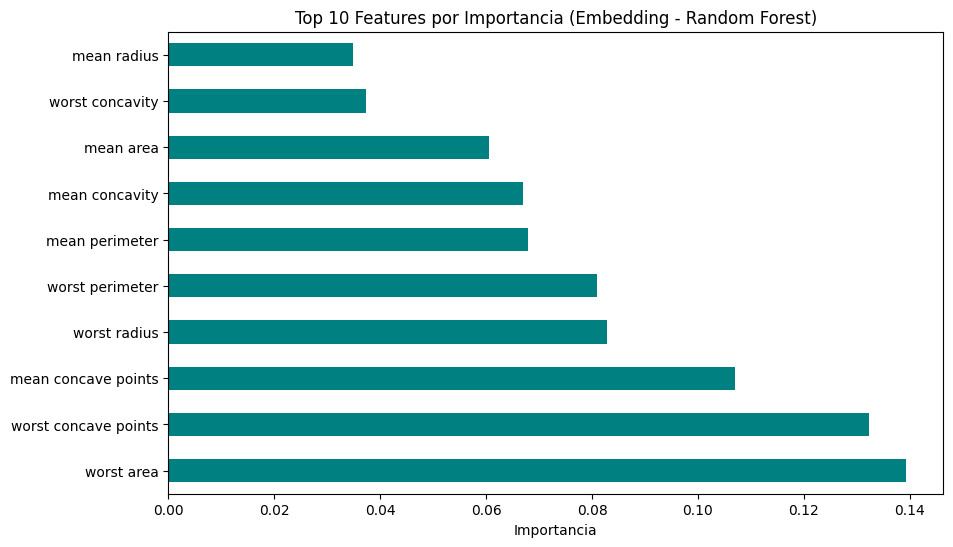

In [138]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 1- normalizacao dos dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 2- selecao d features via embedding
rf = RandomForestClassifier(random_state=42)

start_embedding = time.time()
rf.fit(X_scaled, y)  # o treinamento jaaprende a importancia das features
feature_importances = pd.Series(rf.feature_importances_, index=X_scaled.columns)

# correcao: converte para uma lista de strings e garante que as colunas existem no DataFrame
selected_features_embedding = feature_importances.nlargest(10).index.intersection(X_scaled.columns).tolist()
end_embedding = time.time()

print("features selecionadas (Embedding):", selected_features_embedding)

# 3 funcao para avaliar modelos
def evaluate_model(X, y, model, cv=5):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    acc_scores, f1_scores, auc_scores = [], [], []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        acc_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        auc_scores.append(roc_auc_score(y_test, y_proba))

    return {
        'Accuracy': np.mean(acc_scores),
        'F1-Score': np.mean(f1_scores),
        'AUC-ROC': np.mean(auc_scores)
    }

# 4.avaliação do modelo usando todas as features
print("resultados com todas as features:")
results_full = evaluate_model(X_scaled, y, rf)
print(results_full)

# 5 avaliacao do modelo com features selecionadas pelo método Embedding
X_embedding_selected = X_scaled[selected_features_embedding]  # garantindo que as colunas existem
print("resultados com features selecionadas (Embedding):")
results_embedding = evaluate_model(X_embedding_selected, y, rf)
print(results_embedding)

#6 comparacao com wrapper**
start_wrapper = time.time()
rfe_selector = RFE(estimator=rf, n_features_to_select=10, step=1)
rfe_selector.fit(X_scaled, y)

#correcao:verifica se as features selecionadas realmente existem no DataFrame
selected_features_wrapper = X_scaled.columns[rfe_selector.get_support()].tolist()
end_wrapper = time.time()

X_wrapper_selected = X_scaled[selected_features_wrapper]
print("resultados com features selecionadas (wrapper):")
results_wrapper = evaluate_model(X_wrapper_selected, y, rf)
print(results_wrapper)

# 7 tabela cmparativa dos rrsultados
results_df = pd.DataFrame({
    'Método': ['Todas Features', 'Embedding', 'Wrapper'],
    'Accuracy': [results_full['Accuracy'], results_embedding['Accuracy'], results_wrapper['Accuracy']],
    'F1-Score': [results_full['F1-Score'], results_embedding['F1-Score'], results_wrapper['F1-Score']],
    'AUC-ROC': [results_full['AUC-ROC'], results_embedding['AUC-ROC'], results_wrapper['AUC-ROC']]
})
print("tabela comparativa dos resultados:")
print(results_df)

# tempo de execução dos metodos
print(f"tempo de execucao - embedding: {end_embedding - start_embedding:.4f} seg")
print(f"tempo de execucao - wrapper: {end_wrapper - start_wrapper:.4f} sg")

# 9 visualizaca da importancia das features
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Features por Importancia (Embedding - Random Forest)")
plt.xlabel("Importancia")
plt.show()


In [139]:
#8 - Utilize o método Bag-of-Words para transformar o texto acima em um vetor. Apresente a vetorização obtida.
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re

# texto fornecido
texto = """A alma é, pois, imortal; renasceu repetidas vezes na existência e contemplou todas as coisas existentes e por isso não há nada que ela não conheça! Não é de espantar que ela seja capaz de evocar à memória a lembrança de objetos que viu anteriormente, e que se relacionam tanto com a virtude como com as outras coisas existentes. Toda a natureza, com efeito, é uma só, é um todo orgânico, e o espírito já viu todas as coisas; logo, nada impede que ao nos lembrarmos de uma coisa – o que nós, homens, chamamos de “saber” – todas as outras coisas acorram imediata e maquinalmente à nossa consciência."""

# funcao de pre-processamento
def preprocessar_texto(texto):
    # converter para minusculas
    texto = texto.lower()
    # remover pontuacao e caracteres especiais
    texto = re.sub(r'[^\w\s]', ' ', texto)
    # substituir multiplos espacos por um unico espaço
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

# aplicar pre-processamento
texto_processado = preprocessar_texto(texto)

#inicializar o countVectorizer (Bag-of-Words)
vectorizer = CountVectorizer()

#ajustar o modelo e transformar o texto em vetor
X = vectorizer.fit_transform([texto_processado])

# obter o vocabulario (palavras unicas)
vocabulario = vectorizer.get_feature_names_out()

# converter o vetor para um array numpy
vetor = X.toarray()[0]

# criar um dataFrame para visualizacao clara
df_vetorizacao = pd.DataFrame({
    'Palavra': vocabulario,
    'Frequência': vetor
})

# exibir resultados
print("vetorizacao bag-of-words")
print("texto processado:")
print(texto_processado)
print("vocabulário (palavras unicas):")
print(vocabulario)
print("vVetor de frequencias:")
print(vetor)
print("tabela de vetorizacao:")
print(df_vetorizacao.to_string(index=False))

vetorizacao bag-of-words
texto processado:
a alma é pois imortal renasceu repetidas vezes na existência e contemplou todas as coisas existentes e por isso não há nada que ela não conheça não é de espantar que ela seja capaz de evocar à memória a lembrança de objetos que viu anteriormente e que se relacionam tanto com a virtude como com as outras coisas existentes toda a natureza com efeito é uma só é um todo orgânico e o espírito já viu todas as coisas logo nada impede que ao nos lembrarmos de uma coisa o que nós homens chamamos de saber todas as outras coisas acorram imediata e maquinalmente à nossa consciência
vocabulário (palavras unicas):
['acorram' 'alma' 'anteriormente' 'ao' 'as' 'capaz' 'chamamos' 'coisa'
 'coisas' 'com' 'como' 'conheça' 'consciência' 'contemplou' 'de' 'efeito'
 'ela' 'espantar' 'espírito' 'evocar' 'existentes' 'existência' 'homens'
 'há' 'imediata' 'imortal' 'impede' 'isso' 'já' 'lembrança' 'lembrarmos'
 'logo' 'maquinalmente' 'memória' 'na' 'nada' 'natureza' '

Bag-of-n-Grams 
numero de Unigrams: 63
Número de Bigrams: 82
Número de Trigrams: 86
tabela de N-Grams extraídos:
    Tipo  Quantidade
Unigrams          63
 Bigrams          82
Trigrams          86
lista de Unigrams:
['acorram' 'alma' 'anteriormente' 'ao' 'as' 'capaz' 'chamamos' 'coisa'
 'coisas' 'com' 'como' 'conheça' 'consciência' 'contemplou' 'de' 'efeito'
 'ela' 'espantar' 'espírito' 'evocar' 'existentes' 'existência' 'homens'
 'há' 'imediata' 'imortal' 'impede' 'isso' 'já' 'lembrança' 'lembrarmos'
 'logo' 'maquinalmente' 'memória' 'na' 'nada' 'natureza' 'nos' 'nossa'
 'não' 'nós' 'objetos' 'orgânico' 'outras' 'pois' 'por' 'que' 'relacionam'
 'renasceu' 'repetidas' 'saber' 'se' 'seja' 'só' 'tanto' 'toda' 'todas'
 'todo' 'um' 'uma' 'vezes' 'virtude' 'viu']
lista de Bigrams:
['acorram imediata' 'alma pois' 'anteriormente que' 'ao nos' 'as coisas'
 'as outras' 'capaz de' 'chamamos de' 'coisa que' 'coisas acorram'
 'coisas existentes' 'coisas logo' 'com as' 'com efeito' 'com virtude'
 '

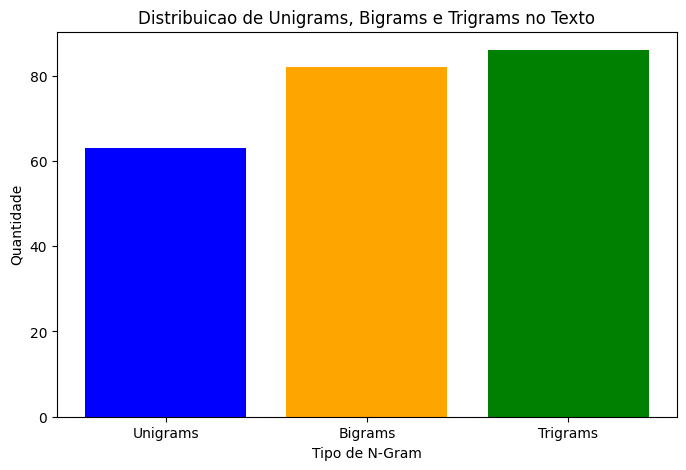

In [140]:
#9 -
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

texto = """A alma é, pois, imortal; renasceu repetidas vezes na existência e contemplou todas as coisas existentes e por isso não há nada que ela não conheça! Não é de espantar que ela seja capaz de evocar à memória a lembrança de objetos que viu anteriormente, e que se relacionam tanto com a virtude como com as outras coisas existentes. Toda a natureza, com efeito, é uma só, é um todo orgânico, e o espírito já viu todas as coisas; logo, nada impede que ao nos lembrarmos de uma coisa – o que nós, homens, chamamos de “saber” – todas as outras coisas acorram imediata e maquinalmente à nossa consciência."""

# 1 funcao para aplicar Bag-of-n-Grams
def aplicar_bag_of_ngrams(texto, n):
    vectorizer = CountVectorizer(ngram_range=(n, n))  # define N-Gram
    X = vectorizer.fit_transform([texto])  # vetoriza o texto
    vocabulario = vectorizer.get_feature_names_out()  # obtem os N-Grams gerados
    return vocabulario

# 2 extracao dos N-Grams
unigrams = aplicar_bag_of_ngrams(texto, 1)
bigrams = aplicar_bag_of_ngrams(texto, 2)
trigrams = aplicar_bag_of_ngrams(texto, 3)

#3 criar dataframe para analise quantitativa
df_ngrams = pd.DataFrame({
    "Tipo": ["Unigrams", "Bigrams", "Trigrams"],
    "Quantidade": [len(unigrams), len(bigrams), len(trigrams)]
})

# 4-exibir resultados
print("Bag-of-n-Grams ")
print(f"numero de Unigrams: {len(unigrams)}")
print(f"Número de Bigrams: {len(bigrams)}")
print(f"Número de Trigrams: {len(trigrams)}")

print("tabela de N-Grams extraídos:")
print(df_ngrams.to_string(index=False))

print("lista de Unigrams:")
print(unigrams)

print("lista de Bigrams:")
print(bigrams)

print("lista de Trigrams:")
print(trigrams)

#5- visualizacao da distribuicao dos N-Grams
plt.figure(figsize=(8, 5))
plt.bar(df_ngrams["Tipo"], df_ngrams["Quantidade"], color=["blue", "orange", "green"])
plt.xlabel("Tipo de N-Gram")
plt.ylabel("Quantidade")
plt.title("Distribuicao de Unigrams, Bigrams e Trigrams no Texto")
plt.show()


comparacao qualitativa
texto original (trecho inicial):
A alma é, pois, imortal; renasceu repetidas vezes na existência e contemplou todas as coisas existen...
texto sem stopwords (reconstruido):
alma pois imortal renasceu repetidas vezes existência contemplou todas coisas existentes nada conheç...
resultados do pre-processamento com Remocao de stopwords
1 texto original:
A alma é, pois, imortal; renasceu repetidas vezes na existência e contemplou todas as coisas existentes e por isso não há nada que ela não conheça! Não é de espantar que ela seja capaz de evocar à memória a lembrança de objetos que viu anteriormente, e que se relacionam tanto com a virtude como com as outras coisas existentes. Toda a natureza, com efeito, é uma só, é um todo orgânico, e o espírito já viu todas as coisas; logo, nada impede que ao nos lembrarmos de uma coisa – o que nós, homens, chamamos de “saber” – todas as outras coisas acorram imediata e maquinalmente à nossa consciência.
2 tokens originais (20):
['

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


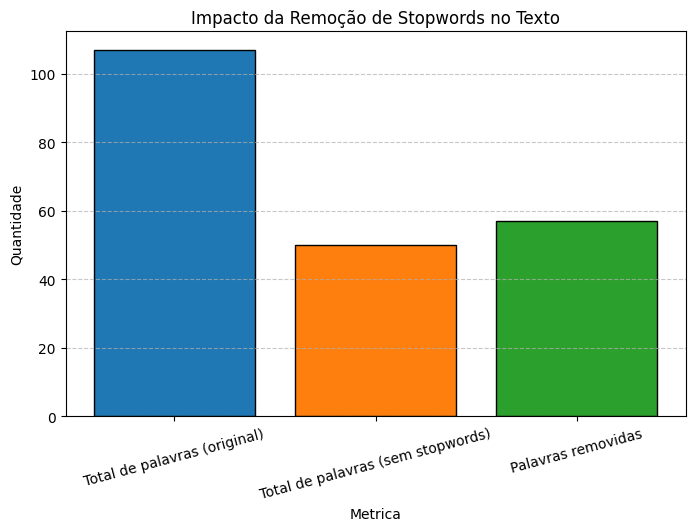

10 palavras mais frequentes no texto original:
Palavra  Frequência
    que           6
      e           5
     de           5
      a           4
      é           4
     as           4
 coisas           4
  todas           3
    não           3
    com           3
10 palavras mais frequentes sem stopwords:
   Palavra  Frequência
    coisas           4
     todas           3
existentes           2
      nada           2
       viu           2
    outras           2
      alma           1
      pois           1
   imortal           1
  renasceu           1
exemplos de stopwords removidas (primeiras 10):
['a', 'é', 'na', 'e', 'as', 'e', 'por', 'isso', 'não', 'há']


In [141]:
#10 -


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# download dos recursos do NLTK (executar uma vez)
nltk.download('stopwords')

#1- definicao do texto fornecido
texto = """A alma é, pois, imortal; renasceu repetidas vezes na existência e contemplou todas as coisas existentes e por isso não há nada que ela não conheça! Não é de espantar que ela seja capaz de evocar à memória a lembrança de objetos que viu anteriormente, e que se relacionam tanto com a virtude como com as outras coisas existentes. Toda a natureza, com efeito, é uma só, é um todo orgânico, e o espírito já viu todas as coisas; logo, nada impede que ao nos lembrarmos de uma coisa – o que nós, homens, chamamos de “saber” – todas as outras coisas acorram imediata e maquinalmente à nossa consciência."""

#2. funcao para remocao de stopwords
def remover_stopwords(texto, stopwords_adicionais=None):
    """
    remove stopwords de um texto, com opcao de adicionar palavras personalizadas a lista.
    Args:
        texto : texto de entrada.
        stopwords_adicionais (list): lista opcional de stopwords extras a remover.
    Returno:
        tokens originais e tokens sem stopwords.
    """
    # tokenizador que captura apenas palavras
    tokenizer = RegexpTokenizer(r'\b\w+\b')
    tokens = tokenizer.tokenize(texto.lower())  #converte para minusculas para consistencia

    #carrega stopwords em portugues do NLTK
    stop_words = set(stopwords.words('portuguese'))

    #adiciona stopwords personalizadas, se fornecidas
    if stopwords_adicionais:
        stop_words.update(stopwords_adicionais)

    # remove stopwords, mantendo apenas palavras significativas
    tokens_filtrados = [token for token in tokens if token.isalpha() and token not in stop_words]

    return tokens, tokens_filtrados

#3. aplicacao da funcao ao texto
#exemplo com stopwords padrao e uma stopword personalizada
stopwords_personalizadas = ['coisa']  # palavra que pode ser considerada irrelevante no contexto
tokens_originais, tokens_sem_stopwords = remover_stopwords(texto, stopwords_personalizadas)

# 4. validacao quantitativa
# calcula metricas para avaliar o impacto da remocao
total_palavras = len(tokens_originais)
total_palavras_sem_stopwords = len(tokens_sem_stopwords)
palavras_removidas = total_palavras - total_palavras_sem_stopwords

# organiza resultados em um DataFrame para clareza
df_resultados = pd.DataFrame({
    "Métrica": ["Total de palavras (original)", "Total de palavras (sem stopwords)", "Palavras removidas"],
    "Quantidade": [total_palavras, total_palavras_sem_stopwords, palavras_removidas]
})

#5.comparacao qualitativa
# para ilustrar o impacto semantico, reconstruimos o texto sem stopwords
texto_reconstruido = ' '.join(tokens_sem_stopwords)
print("comparacao qualitativa")
print("texto original (trecho inicial):")
print(texto[:100] + "...")
print("texto sem stopwords (reconstruido):")
print(texto_reconstruido[:100] + "...")

#6. exibicao dos resultado
print("resultados do pre-processamento com Remocao de stopwords")
print("1 texto original:")
print(texto)
print("2 tokens originais (20):")
print(tokens_originais[:20])
print("3 tokens apos remocao de stopwords:")
print(tokens_sem_stopwords)
print("4 resumo quantitativo:")
print(df_resultados.to_string(index=False))

#6 visualizacao grafica
plt.figure(figsize=(8, 5))
plt.bar(df_resultados["Métrica"], df_resultados["Quantidade"],
        color=["#1f77b4", "#ff7f0e", "#2ca02c"], edgecolor="black")
plt.xlabel("Metrica")
plt.ylabel("Quantidade")
plt.title("Impacto da Remoção de Stopwords no Texto")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 7. analise de frequencia
# compara as palavras mais comuns antes e depois da remocao
freq_originais = Counter(tokens_originais)
freq_sem_stopwords = Counter(tokens_sem_stopwords)

print("10 palavras mais frequentes no texto original:")
print(pd.DataFrame(freq_originais.most_common(10), columns=["Palavra", "Frequência"]).to_string(index=False))
print("10 palavras mais frequentes sem stopwords:")
print(pd.DataFrame(freq_sem_stopwords.most_common(10), columns=["Palavra", "Frequência"]).to_string(index=False))

#8. validacao: exemplos de Stopwords removidas
stop_words = set(stopwords.words('portuguese')).union(set(stopwords_personalizadas))
stopwords_encontradas = [token for token in tokens_originais if token in stop_words]
print("exemplos de stopwords removidas (primeiras 10):")
print(stopwords_encontradas[:10])


In [142]:
!pip install nltk
!python -m spacy download pt_core_news_sm
!pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 46.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


3.8.5
texto original:
A alma é, pois, imortal; renasceu repetidas vezes na existência e contemplou todas as coisas existentes e por isso não há nada que ela não conheça! Não é de espantar que ela seja capaz de evocar à memória a lembrança de objetos que viu anteriormente, e que se relacionam tanto com a virtude como com as outras coisas existentes. Toda a natureza, com efeito, é uma só, é um todo orgânico, e o espírito já viu todas as coisas; logo, nada impede que ao nos lembrarmos de uma coisa – o que nós, homens, chamamos de “saber” – todas as outras coisas acorram imediata e maquinalmente à nossa consciência.
stemming (NLTK):
['a', 'alma', 'é', 'pois', 'imortal', 'renasc', 'repet', 'vez', 'na', 'existent', 'e', 'contempl', 'tod', 'as', 'cois', 'existent', 'e', 'por', 'isso', 'nã', 'há', 'nad', 'que', 'ela', 'nã', 'conhec', 'nã', 'é', 'de', 'espant']
texto reconstruido apos stemming (apenas palavras stemizadas):
a alma é pois imortal renasc repet vez na existent e contempl tod as coi

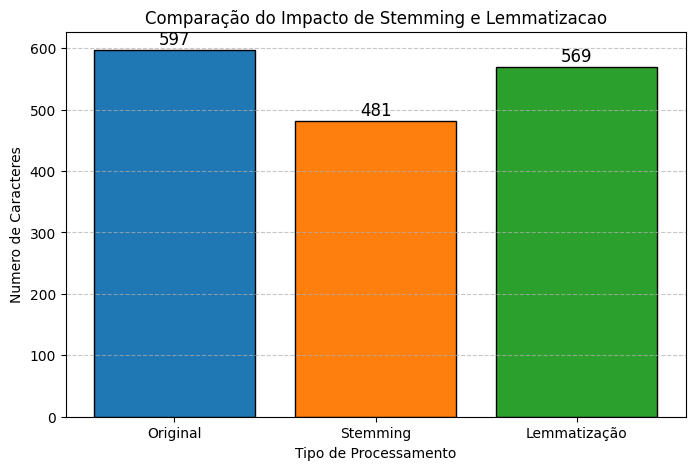

In [143]:
#11 -

import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import spacy

print(spacy.__version__)  # verifique se SpaCy esta instalado
# verificar e baixar recursos do NLTK

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    try:
        nltk.download('punkt_tab')
    except Exception as e:
        print(f"Erro ao baixar 'punkt_tab': {e}")

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    try:
        nltk.download('punkt')
    except Exception as e:
        print(f"Erro ao baixar 'punkt': {e}")


# inicializar o Stemmer para portugues
stemmer = SnowballStemmer('portuguese')  # stemmer otimizado para portugues

# implementacao alternativa com PorterStemmer (descomentar se necessario)
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()  # stemmer para ingles; usar apenas para textos em ingles

# carregar modelo SpaCy para portugues (usado apenas na lemmatizacao)
try:
    modelo_spacy = spacy.load('pt_core_news_sm')  # modelo pequeno para portugues
except OSError:
    print("aviso: modelo n encontrado")
    modelo_spacy = None

# teexto fornecido para processamento
texto = """A alma é, pois, imortal; renasceu repetidas vezes na existência e contemplou todas as coisas existentes e por isso não há nada que ela não conheça! Não é de espantar que ela seja capaz de evocar à memória a lembrança de objetos que viu anteriormente, e que se relacionam tanto com a virtude como com as outras coisas existentes. Toda a natureza, com efeito, é uma só, é um todo orgânico, e o espírito já viu todas as coisas; logo, nada impede que ao nos lembrarmos de uma coisa – o que nós, homens, chamamos de “saber” – todas as outras coisas acorram imediata e maquinalmente à nossa consciência."""

#funcao para aplicar stemming com NLTk
def aplicar_stemming(texto: str) -> None:
    """
    Aplica stemming em um texto em português usando NLTK (SnowballStemmer).
    Exibe o texto original, tokens stemizados e texto reconstruído.
    Atende à Questão 11: stemming com NLTK e apresentação do resultado.

    Args:
        texto (str): Texto a ser processado.
    """
    # validar entrada
    if not texto.strip():
        raise ValueError("O texto de entrada não pode estar vazio.")

    #tokenizacao com NLTK
    tokens = word_tokenize(texto.lower())

    # aplicar Stemming (NLTK) apenas a palavras alfabeticas
    stemming = [stemmer.stem(token) for token in tokens if token.isalpha()]

    # exibicao dos resultados
    print("texto original:")
    print(texto)

    print("stemming (NLTK):")
    print(stemming[:30])  # mostrando os primeiros (30)

    print("texto reconstruido apos stemming (apenas palavras stemizadas):")
    print(" ".join(stemming))

#funcao para aplicar Lemmatizacao com SpaCy
def aplicar_lemmatizacao(texto: str) -> None:
    """
    Aplica lemmatização em um texto em português usando SpaCy (diferencial).
    Exibe os tokens lematizados. Não faz parte da Questão 11.

    Args:
        texto (str): Texto a ser processado.
    """
    if modelo_spacy is None:
        print("Lemmatização não disponível: modelo SpaCy não carregado.")
        return

    #processar texto com modelo do SpaCy
    doc_spacy = modelo_spacy(texto.lower())

    # aplicar lemmatizacao (SpaCy)
    lematizacao = [token.lemma_ for token in doc_spacy if token.text.isalpha()]

    # exibicao dos resultados
    print("lemmatizacao (SpaCy - pt_core_news_sm):")
    print(lematizacao[:30])  # mostrando os primeiros (30) tokens lematizados

#executar as funcoes com o texto
try:
    # executar stemming
    aplicar_stemming(texto)

    # executar lemmatizacao
    print("diferencial: resultado da lemmatizacao (SpaCy)")
    aplicar_lemmatizacao(texto)
except Exception as e:
    print(f"[Erro] ao processar o texto: {e}")


# funcao para contar caracteres nos textos
def contar_caracteres(texto: str) -> int:
    return len(texto)

# contagem de caracteres nos textos processados
texto_stemming = " ".join([stemmer.stem(token) for token in word_tokenize(texto.lower()) if token.isalpha()])
texto_lemmatizacao = " ".join([token.lemma_ for token in modelo_spacy(texto.lower()) if token.text.isalpha()]) if modelo_spacy else "Modelo SpaCy não carregado"

#exibir numero de caracteres
print("numero de caracteres no texto original:", contar_caracteres(texto))
print("numero de caracteres aps Stemming:", contar_caracteres(texto_stemming))
print("numero de caracteres apos Lemmatização:", contar_caracteres(texto_lemmatizacao))



# criar um grafico comparando a quantidade de caracteres nas versoes do texto
caracteres_original = len(texto)
caracteres_stemming = len(texto_stemming)
caracteres_lemmatizacao = len(texto_lemmatizacao) if modelo_spacy else 0  # caso o modelo n esteja carregado

# configurcao do grafico
labels = ['Original', 'Stemming', 'Lemmatização']
valores = [caracteres_original, caracteres_stemming, caracteres_lemmatizacao]

plt.figure(figsize=(8, 5))
plt.bar(labels, valores, color=['#1f77b4', '#ff7f0e', '#2ca02c'], edgecolor="black")

# adicionar rotulos aos eixos
plt.xlabel("Tipo de Processamento")
plt.ylabel("Numero de Caracteres")
plt.title("Comparação do Impacto de Stemming e Lemmatizacao")

#exibir os valores exatos acima das barras
for i, v in enumerate(valores):
    plt.text(i, v + 10, str(v), ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   Token Original Lemma (NLTK - Ingles) Lemma (spaCy - Portugues)
0               a                     a                         o
1            alma                  alma                      alma
2               é                     é                       ser
3               ,                   poi                      pois
4            pois               imortal                   imortal
5               ,              renasceu                  renascer
6         imortal             repetidas                  repetido
7               ;                 vezes                       vez
8        renasceu                    na                      em o
9       repetidas            existência                existência
10          vezes                     e                         e
11             na            contemplou                contemplar
12     existência                  toda                      todo
13              e                     a                         o
14     con

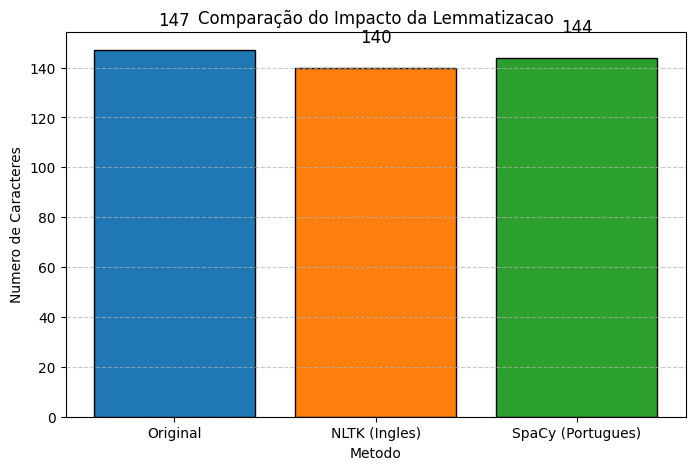

In [144]:
#12 -
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer  # lematizador do NLTK (p ingles)

# verificar e baixar recursos necessarios
nltk.download('punkt')
nltk.download('wordnet')  # necessario apenas para WordNetLemmatizer

# texto fornecido para processamento
texto = """A alma é, pois, imortal; renasceu repetidas vezes na existência e contemplou todas as coisas existentes e por isso não há nada que ela não conheça!"""

# inicializar o WordNetLemmatizer (NLTK -p/ ingles)
lemmatizer_nltk = WordNetLemmatizer()

# inicializar o modelo SpaCy para port-br
try:
    nlp = spacy.load("pt_core_news_sm")
except OSError:
    print("modelo n encontrado")
    nlp = None

# funcao para aplicar lemmatização com NLTK
def aplicar_lemmatizacao_nltk(texto: str):
    tokens = word_tokenize(texto.lower())
    lemmas_nltk = [lemmatizer_nltk.lemmatize(token) for token in tokens if token.isalpha()]
    return tokens, lemmas_nltk

#funcao para aplicar lemmatizacao correta com SpaCy (pt)
def aplicar_lemmatizacao_spacy(texto: str):
    if nlp is None:
        return None, None
    doc = nlp(texto)
    tokens_spacy = [token.text for token in doc if token.is_alpha]
    lemmas_spacy = [token.lemma_ for token in doc if token.is_alpha]
    return tokens_spacy, lemmas_spacy

#aplicacao da lemmatizacao
tokens_nltk, lemmas_nltk = aplicar_lemmatizacao_nltk(texto)
tokens_spacy, lemmas_spacy = aplicar_lemmatizacao_spacy(texto) if nlp else (None, None)

# ajuste dos tamanhos dos arrays
min_length = min(len(tokens_nltk), len(lemmas_nltk), len(lemmas_spacy))

# criar dataFrame para comparacao
resultados = pd.DataFrame({
    "Token Original": tokens_nltk[:min_length],
    "Lemma (NLTK - Ingles)": lemmas_nltk[:min_length],
    "Lemma (spaCy - Portugues)": lemmas_spacy[:min_length]
})

# exibir resultados
print(resultados.head(20))

# grafico de comparacao
valores = [len(texto), len(" ".join(lemmas_nltk)), len(" ".join(lemmas_spacy)) if lemmas_spacy else 0]
labels = ["Original", "NLTK (Ingles)", "SpaCy (Portugues)"]

plt.figure(figsize=(8, 5))
plt.bar(labels, valores, color=['#1f77b4', '#ff7f0e', '#2ca02c'], edgecolor="black")
plt.xlabel("Metodo")
plt.ylabel("Numero de Caracteres")
plt.title("Comparação do Impacto da Lemmatizacao")

for i, v in enumerate(valores):
    plt.text(i, v + 10, str(v), ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [146]:
# comparacoes adicionais
print("comparação de total de tokens:")
print(f"total de tokens no texto original: {len(tokens_nltk)}")
print(f"total de lemmas obtidos com NLTK: {len(lemmas_nltk)}")
print(f"total de lemmas obtidos com SpaCy: {len(lemmas_spacy) if lemmas_spacy else 'Modelo não carregado'}")

# contagem de caracteres nas versoes processadas
caracteres_original = len(texto)
caracteres_lemmatizacao_nltk = len(" ".join(lemmas_nltk))
caracteres_lemmatizacao_spacy = len(" ".join(lemmas_spacy)) if lemmas_spacy else 0

print("comparacao de numero de caracteres:")
print(f"numero de caracteres no texto original: {caracteres_original}")
print(f"numero de caracteres apos Lemmatização (NLTK): {caracteres_lemmatizacao_nltk}")
print(f"numero de caracteres apos Lemmatização (SpaCy): {caracteres_lemmatizacao_spacy if caracteres_lemmatizacao_spacy else 'Modelo não carregado'}")

# comparacao percentual da reducao
redução_nltk = ((caracteres_original - caracteres_lemmatizacao_nltk) / caracteres_original) * 100
redução_spacy = ((caracteres_original - caracteres_lemmatizacao_spacy) / caracteres_original) * 100 if caracteres_lemmatizacao_spacy else 0

print("reducao percentual do tamanho do texto:")
print(f"reducao com NLTK: {redução_nltk:.2f}%")
print(f"Reducao com SpaCy: {redução_spacy:.2f}%")

#analise dos resultados
print("analise:")
print("O NLTK, utilizando o WordNetLemmatizer, realiza a lemmatização baseada no inglês, podendo gerar resultados menos precisos para português.")
print("O SpaCy, por outro lado, emprega um modelo específico para o português, oferecendo uma lemmatização mais correta e contextualizada.")
print("A redução no número de caracteres mostra como cada abordagem impacta a simplificação do texto.")


comparação de total de tokens:
total de tokens no texto original: 30
total de lemmas obtidos com NLTK: 26
total de lemmas obtidos com SpaCy: 26
comparacao de numero de caracteres:
numero de caracteres no texto original: 147
numero de caracteres apos Lemmatização (NLTK): 140
numero de caracteres apos Lemmatização (SpaCy): 144
reducao percentual do tamanho do texto:
reducao com NLTK: 4.76%
Reducao com SpaCy: 2.04%
analise:
O NLTK, utilizando o WordNetLemmatizer, realiza a lemmatização baseada no inglês, podendo gerar resultados menos precisos para português.
O SpaCy, por outro lado, emprega um modelo específico para o português, oferecendo uma lemmatização mais correta e contextualizada.
A redução no número de caracteres mostra como cada abordagem impacta a simplificação do texto.
